# Análise de Sistemas em Tempo Contínuo no Domínio do Tempo

## Resposta de Estado Nulo. 

A resposta de estado nulo é a resposta do sistema relaxado (com condições iniciais nulas) em $t=0$, sob entrada $x(t)$.

### A Integral de Convolução

Considere um sistema $S$ sem energia armazenada, isto é, relaxado, com entrada $x(t)$ e saída $y(t)$,

$$x(t) \Rightarrow S\Rightarrow y(t),$$

e agora substitua a entrada por um impulso unitário. A saída será $h(t)$.

$$\delta(t) \Rightarrow S\Rightarrow h(t).$$

Se atrasarmos o impulso por um intervalo $\tau$, o mesmo ocorrerá com a reposta, pos o sistema é invariante no tempo, isto é,

$$\delta(t-\tau) \Rightarrow S\Rightarrow h(t-\tau).$$

Agora, vamos multiplicar o impulso de entrada por uma amostra de $x(t)$ no instante $t=\tau$.  Como o sistema é linear, por homogeneidade a resposta será multiplicada pelo mesmo valor, 

$$x(\tau)\delta(t-\tau) \Rightarrow S\Rightarrow x(\tau)h(t-\tau).$$

Se esta operação for repetida para vários valores de $\tau$, teremos várias entradas e várias respostas correspondentes. Então, por aditividade, 

$$\sum_{i}^{}x(\tau_i)\delta(t-\tau_i) \Rightarrow S\Rightarrow\sum_{i}^{} x(\tau_i)h(t-\tau_i).$$

Finalmente, em vez de uma somatória discreta consideramos agora a integral contínua ao longo do tempo de $x(\tau)\delta(t-\tau)$. Da mesma forma que antes, teremos

$$\int_{-\infty}^{\infty}x(\tau)\delta(t-\tau) \,d\tau\Rightarrow S\Rightarrow\int_{-\infty}^{\infty} x(\tau)h(t-\tau)\,d\tau.$$

Podemos reconhecer que $\delta(t-\tau)=\delta(\tau-t)$, ou seja, o impulso permanece constante sob reversão. Daí, da integral do lado esquerdo acima teremos, com a propriedade da amostragem do impulso, que

$$ x(t)=\int_{-\infty}^{\infty}x(\tau)\delta(\tau-t) \,d\tau$$

Assim esta integral é apenas o sinal de entrada original, e a saída é dada  pela integral do lado direito, ou seja

$$x(t)\Rightarrow S\Rightarrow\int_{-\infty}^{\infty} x(\tau)h(t-\tau)\,d\tau$$

ou ainda

\begin{equation*}
    y(t)=\int_{-\infty}^{\infty} x(\tau)h(t-\tau)\,d\tau
    \label{} \tag{1}
\end{equation*}

A integral nesta relação é conhecida como **integral de convolução**, e estabelece que a saída é dada pela pela entrada convoluída com a resposta impulsiva. Se a resposta ao impulso é conhecida, com a integral de convolução é possível a determinação da saída para qualquer entrada $x(t)$. A integral de convolução é frequentemente escrita na forma abreviada abaixo:

$$y(t)=x(t)*h(t)$$

A equação (1) dá a resposta em cada instante $t$ para a entrada ocorrendo em intervalos $\tau$. Como $h(t)$ é causal, é necessário que $\tau \le t$. Além disso, com a causalidade de $x(t)$, $x(t)=0\; \forall t<0$, portanto, a equação (1) pode ser reescrita como

$$y(t)=\int_{0}^{t} x(\tau)h(t-\tau)\,d\tau$$

**Exemplo** Na figura abaixo sáo mostradas duas funções , $f_1$, uma função triangular, e $f_2$, um impulso de amplitude unitária com decaimento exponencial.
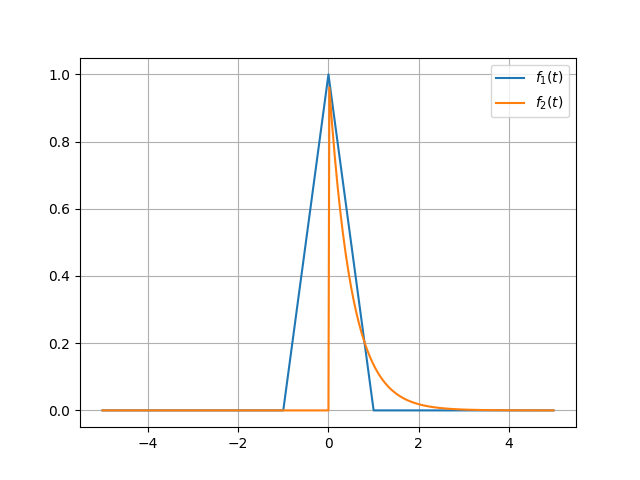



No *script Python* abaixo a convolução das duas funções acima é representada graficamente. 4 instantes de tempo são representados,  mas mais ou diferentes momentos podem ser inseridos facilmente.  Primeiro, $f_2$ (o impulso) é revertida e deslocada à esquerda. Em seguida $f_2$ é continuamente deslocada para direita, interseccionando $f_1$ de forma que a convolução é mostrada como o produto das duas curvas em cada instante, mostrado pela área sombreada.


In [1]:
#!pip install lcapy

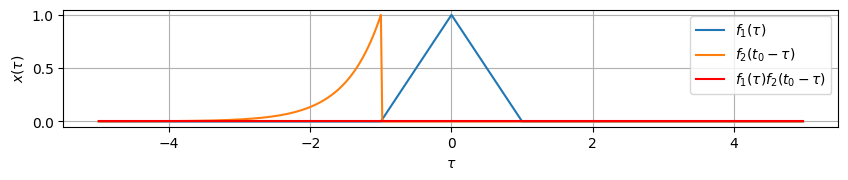

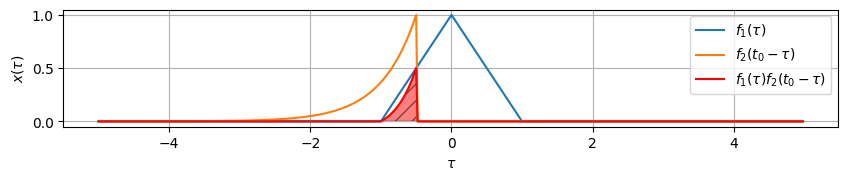

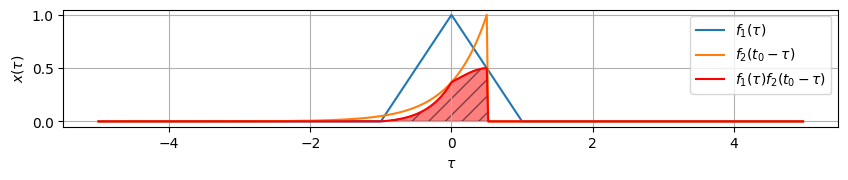

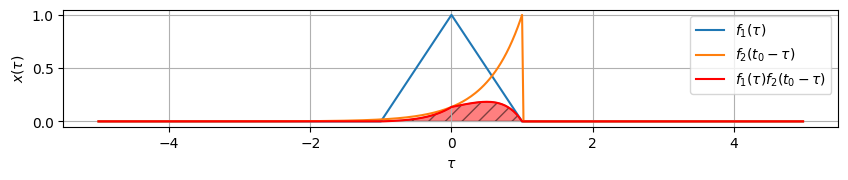

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def showConvolution(f1, f2, t0):
    
    # Cria função revertida e deslocada
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plota as curvas 
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//') 
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$') 
    plt.legend(fontsize=10) 
    plt.show() 

Fs = 50  # frequência de amostragem
T = 5    # faixa d etempo de interesse
t = np.arange(-T, T, 1/Fs)  # amostras de tempo

f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

t0=-1
fig=plt.figure(figsize=(10,7))
plt.subplot(411)
showConvolution(f1, f2, t0)

t0=-0.5

fig=plt.figure(figsize=(10,7))
plt.subplot(412)
showConvolution(f1, f2, t0)

t0=0.5

fig=plt.figure(figsize=(10,7))
plt.subplot(413)
showConvolution(f1, f2, t0)

t0=1

fig=plt.figure(figsize=(10,7))
plt.subplot(414)
showConvolution(f1, f2, t0)

 **Exemplo** Em um determinado sistema, a resposta ao impulso é dada por $h(t)=e^{-2t}u(t)$. A entrada é $x(t)=e^{-t}u(t)$. Vamos determinar a resposta de estado nulo utilizando a integral de convolução:

$$y(t)=x(t)*h(t)=\int_{0}^{t}e^{-\tau}e^{-2(t-\tau)}\,d\tau.$$

Resolvendo a integral resulta em 

$$y(t)=e^{-2t}\int_{0}^{t} e^{-\tau}e^{2\tau}\,d\tau=(e^{-t}-e^{-2t})u(t).$$


**Exemplo** Vamos determinar a resposta de estado nulo do circuito RLC abaixo usando o *software* Lcapy.

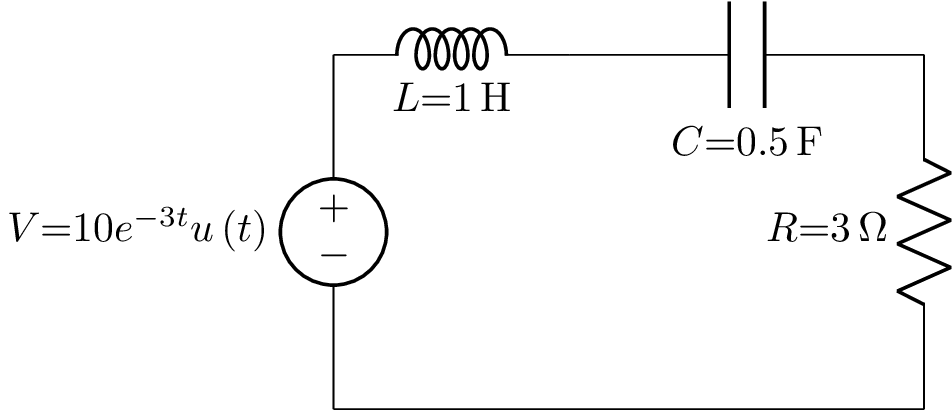

In [3]:
from lcapy import Circuit

cct=Circuit("""
V 0_1 0 {10*exp(-3*t)*u(t)};down
L 0_1 0_2 1;right
C 0_2 1 0.5 ;right,size=1.5
R 1 0_4 {3};down,size=1.5
W 0_4 0; left 
;draw_nodes=none,label_nodes=none""")

cct.draw()


A resposta de estado nulo é a corrente no circuito, e pode ser obtida simplesmente fazendo o seguinte comando:

In [4]:
cct.R.i

⎛     -t       -2⋅t       -3⋅t⎞     
⎝- 5⋅ℯ   + 20⋅ℯ     - 15⋅ℯ    ⎠⋅u(t)

In [5]:
import numpy as np

t = np.linspace(0, 10, 1000)
Ir = cct.R.i.evaluate(t)

O gráfico da corrente é obtido com o *script* abaixo:

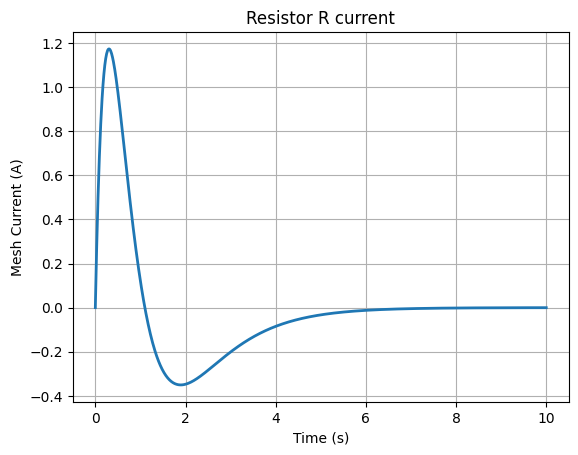

In [6]:
from matplotlib.pyplot import figure

fig = figure()
ax = fig.add_subplot(111, title='Resistor R current')

ax.plot(t, Ir, linewidth=2)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Mesh Current (A)')
ax.grid();

### A resposta total

Finalizando, para um sistema com resposta de entrada nula $y_0(t)$ e resposta de estado nulo $y(t)$, devido à linearidade a resposta total é a soma das duas, ou seja,

$$y_{tot}(t)=y_0(t)+y(t)$$

Por exemplo, para o circuito $RLC$ acima nós encontramos  $y_0(t)=(-5e^{-t}+5e^{-2t})u(t)$ e $y(t)=(-5^{-t}+20e^{-2t}-15e^{-3t})u(t)$. Note que os dois primeiros termos exponenciais de $y(t)$ tem os mesmos autovalores como os de $y_0(t)$, e compartilham dos mesmos modos característicos. A reposta total é 

$$y_{tot}(t)=(-10e^{-t}+25e^{-2t}-15e^{-3t})u(t)$$

A primeira parte da resposta, aquela que contém os modos característicos do sistema, é por vezes denominada de *reposta natural*, enquanto que o termo $e^{-3t}u(t)$ é denominado de *resposta forçada*.